In [121]:
import geopandas as gpd
import pandas as pd
from src.data import shape_processor
import matplotlib.pyplot as plt
from src.constants import DATA_PATH, USER_PATH
import seaborn as sns
from src.data import gedi_pipeline

import importlib
importlib.reload(gedi_pipeline)

2023-11-04 23:16:13,529 DEBUG: Logger /home/jk871/fire-regen/src/data/gedi_pipeline.py already set up. [in get_logger at /home/jk871/fire-regen/src/utils/logging_util.py:51]


<module 'src.data.gedi_pipeline' from '/home/jk871/fire-regen/src/data/gedi_pipeline.py'>

In [2]:
sierras = gpd.read_file("../../data/shapefiles/sierras.shp")


In [14]:
perimeters = gpd.read_file(f"{DATA_PATH}/mtbs/mtbs_perims_DD.shp")

In [21]:
perimeters.Ig_Date = pd.to_datetime(
        perimeters.Ig_Date, utc=True, format='mixed')

In [23]:
perimeters["Ig_Year"] = perimeters.Ig_Date.dt.year

In [34]:
perimeters = perimeters.to_crs("4326")

In [39]:
sierra_perimeters = perimeters.sjoin(sierras, how="inner", predicate="within")

<AxesSubplot: >

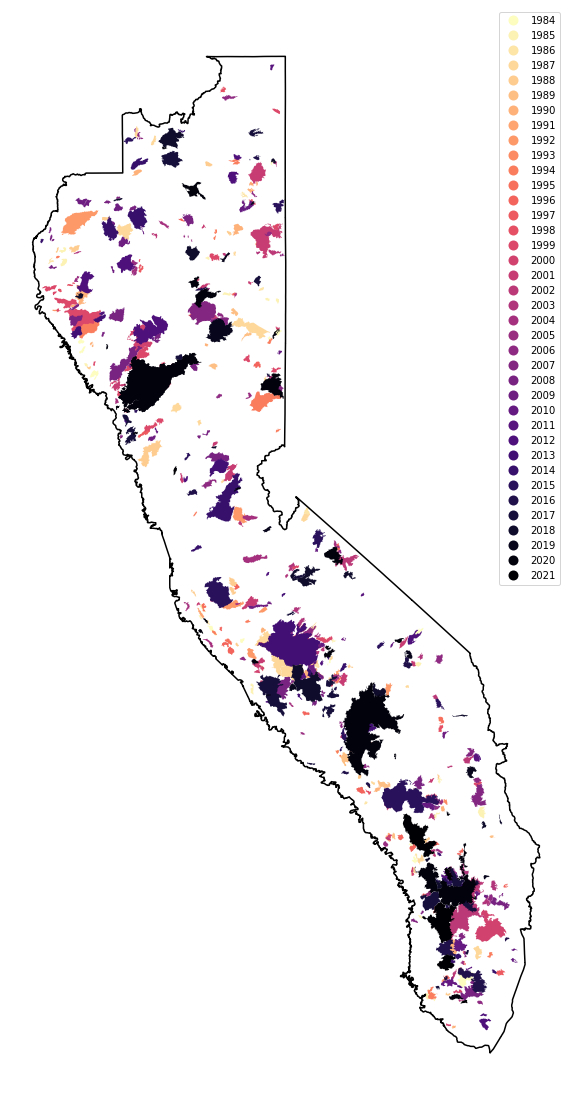

In [74]:
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(10, 30))
sierras.boundary.plot(color="black", ax=ax)
ax.set_axis_off()


#cm = plt.get_cmap('twilight_shifted')
cm = sns.color_palette("magma_r", as_cmap=True)#plt.get_cmap('nipy_spectral')
sierra_perimeters.plot(column="Ig_Year",
        ax=ax, legend=True, cmap=cm, k=38, categorical=True,)

<AxesSubplot: >

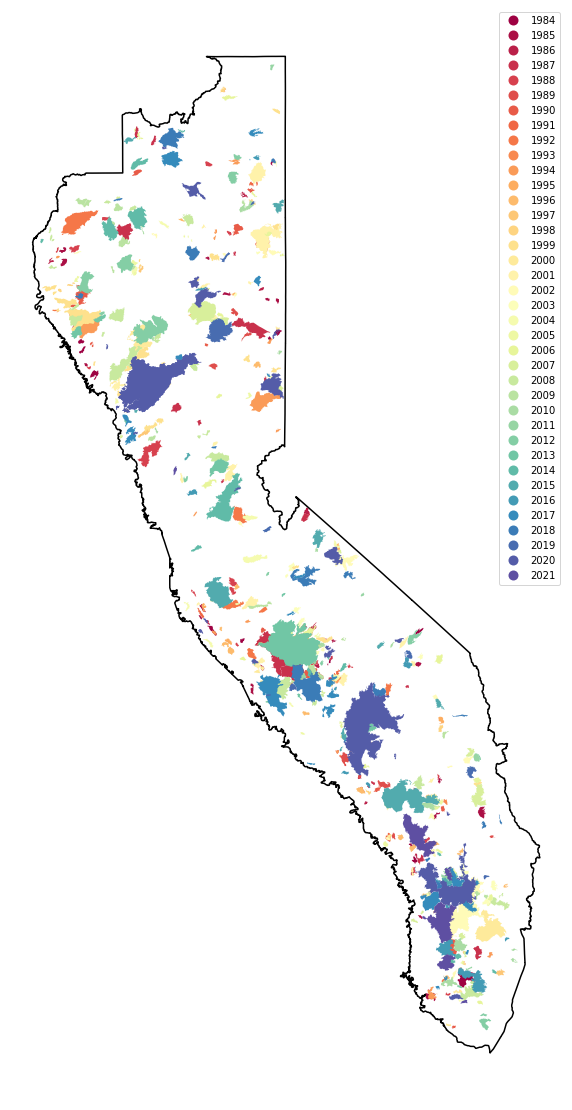

In [75]:
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(10, 30))
sierras.boundary.plot(color="black", ax=ax)
ax.set_axis_off()


#cm = plt.get_cmap('twilight_shifted')
cm = sns.color_palette("Spectral", as_cmap=True)#plt.get_cmap('nipy_spectral')
sierra_perimeters.plot(column="Ig_Year",
        ax=ax, legend=True, cmap=cm, k=38, categorical=True,)

In [77]:
gedi_burned, gedi_unburned = gedi_pipeline.load_stage_11()

In [80]:
gedi_burned_sc = gedi_burned.sjoin(sierras, how="inner", predicate="within")
gedi_unburned_sc = gedi_unburned.sjoin(sierras, how="inner", predicate="within")

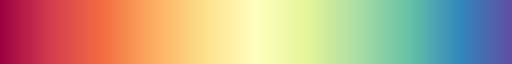

In [89]:
cm = sns.color_palette("Spectral", as_cmap=True)
cm

In [104]:
gedi_burned_sc["label"] = "burned"
gedi_unburned_sc["label"] = "unburned"

In [105]:
gedi = pd.concat([gedi_burned_sc, gedi_unburned_sc])

<AxesSubplot: >

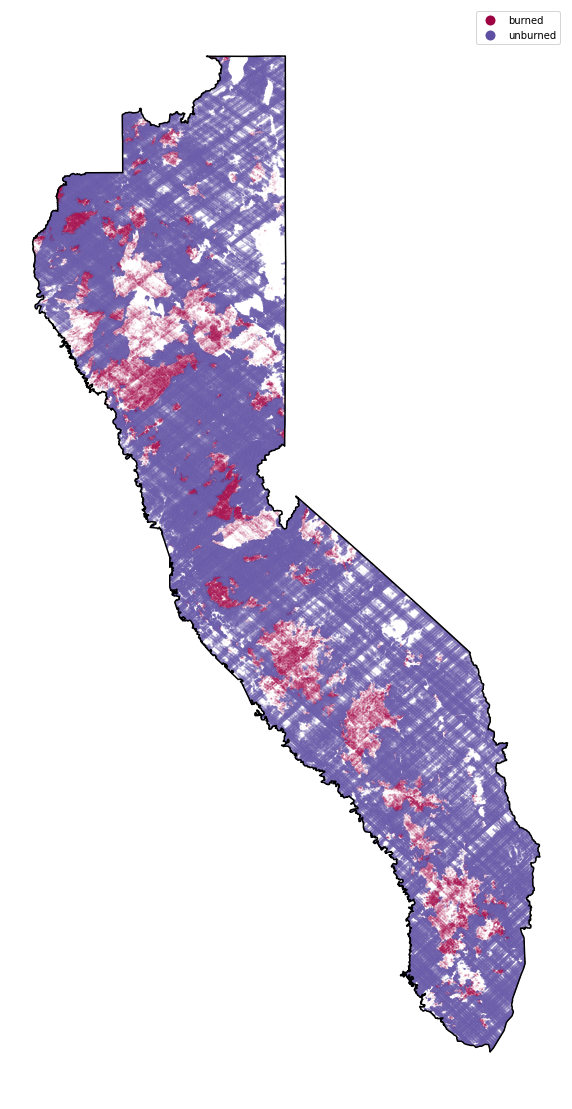

In [108]:
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(10, 30))
sierras.boundary.plot(color="black", ax=ax)
ax.set_axis_off()


#cm = plt.get_cmap('twilight_shifted')
#gedi_burned_sc.plot(ax=ax, markersize=0.0005, color=cm(1.0), label="burned", legend=True)
gedi.plot(column="label", ax=ax, markersize=0.0005, cmap=cm, legend=True)

In [110]:
gedi_burned_6, gedi_unburned_6 = gedi_pipeline.load_stage_6(2)
gedi_burned_sc_6 = gedi_burned_6.sjoin(sierras, how="inner", predicate="within")
gedi_unburned_sc_6 = gedi_unburned_6.sjoin(sierras, how="inner", predicate="within")

gedi_burned_sc_6["label"] = "burned"
gedi_unburned_sc_6["label"] = "unburned"
gedi_6 = pd.concat([gedi_burned_sc_6, gedi_unburned_sc_6])

<AxesSubplot: >

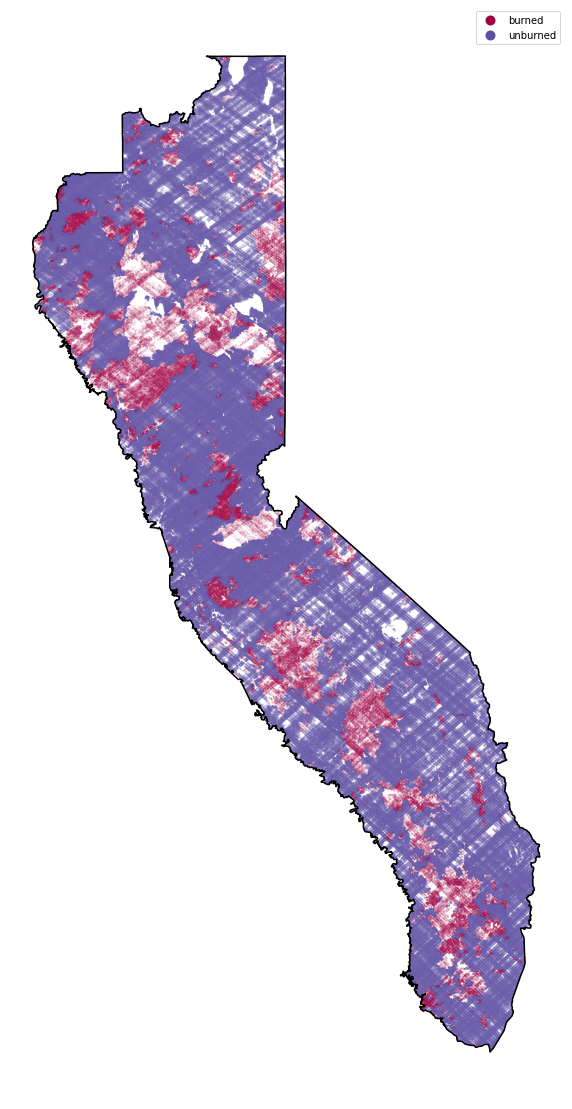

In [111]:
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(10, 30))
sierras.boundary.plot(color="black", ax=ax)
ax.set_axis_off()


#cm = plt.get_cmap('twilight_shifted')
#gedi_burned_sc.plot(ax=ax, markersize=0.0005, color=cm(1.0), label="burned", legend=True)
gedi_6.plot(column="label", ax=ax, markersize=0.0005, cmap=cm, legend=True)

In [113]:
gedi_3 = gedi_pipeline.load_stage_3(2)
gedi_gdf= gedi_3.sjoin(sierras, how="inner", predicate="within")

gedi_gdf = gedi_gdf[
    (gedi_gdf.burn_counts_std == 0) &
    (gedi_gdf.burn_year_std == 0)]
gedi_burned_3 = gedi_gdf[gedi_gdf.burn_counts_median > 0]
gedi_unburned_3 = gedi_gdf[
    (gedi_gdf.burn_counts_median == 0) &
    (gedi_gdf.burn_severity_median == 0) &
    (gedi_gdf.burn_severity_std == 0)]

gedi_burned_3["label"] = "burned"
gedi_unburned_3["label"] = "unburned"
gedi_3 = pd.concat([gedi_burned_3, gedi_unburned_3])

In [114]:
len(gedi_burned_3)

1712770

In [117]:
len(gedi_burned)

492582

<AxesSubplot: >

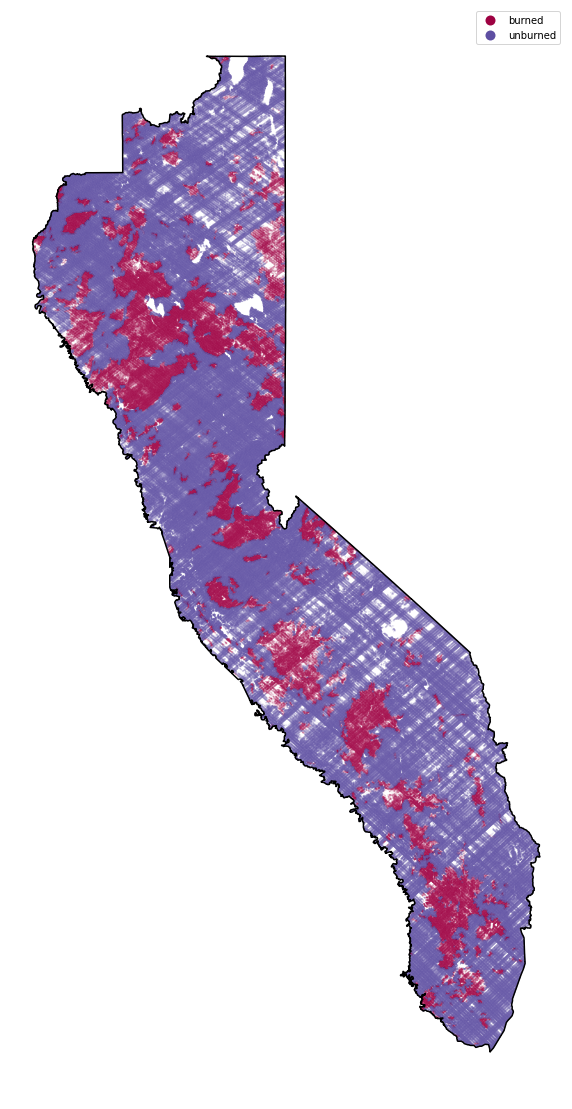

In [118]:
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(10, 30))
sierras.boundary.plot(color="black", ax=ax)
ax.set_axis_off()


#cm = plt.get_cmap('twilight_shifted')
#gedi_burned_sc.plot(ax=ax, markersize=0.0005, color=cm(1.0), label="burned", legend=True)
gedi_3.plot(column="label", ax=ax, markersize=0.0005, cmap=cm, legend=True)

<AxesSubplot: >

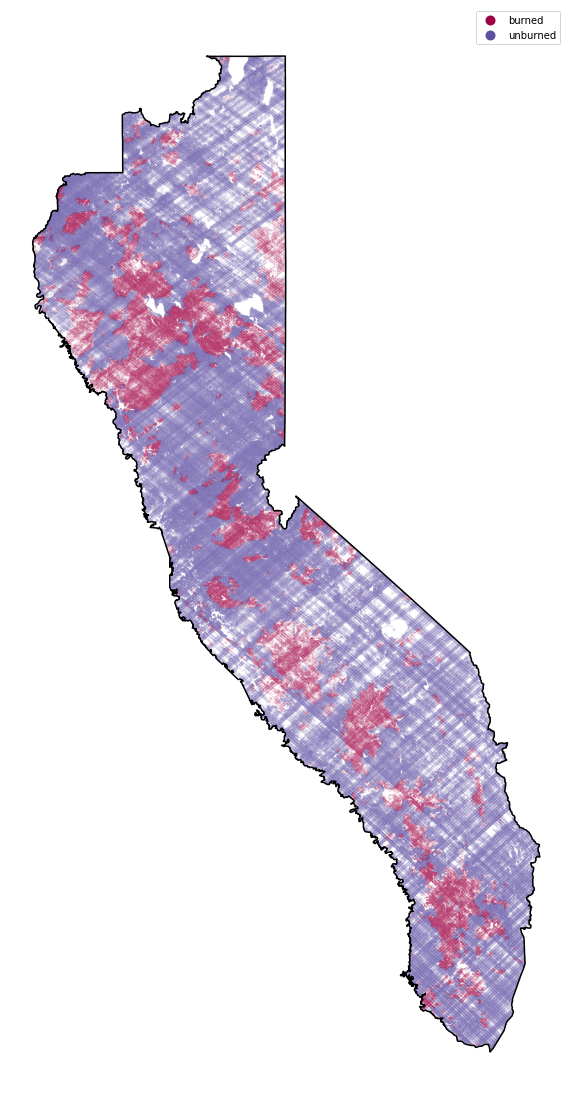

In [119]:
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(10, 30))
sierras.boundary.plot(color="black", ax=ax)
ax.set_axis_off()


#cm = plt.get_cmap('twilight_shifted')
#gedi_burned_sc.plot(ax=ax, markersize=0.0005, color=cm(1.0), label="burned", legend=True)
gedi_3.plot(column="label", ax=ax, markersize=0.0001, cmap=cm, legend=True)

In [122]:
gedi_burned, gedi_unburned = gedi_pipeline.load_stage_7(2)

<AxesSubplot: xlabel='time_since_burn', ylabel='rh_98'>

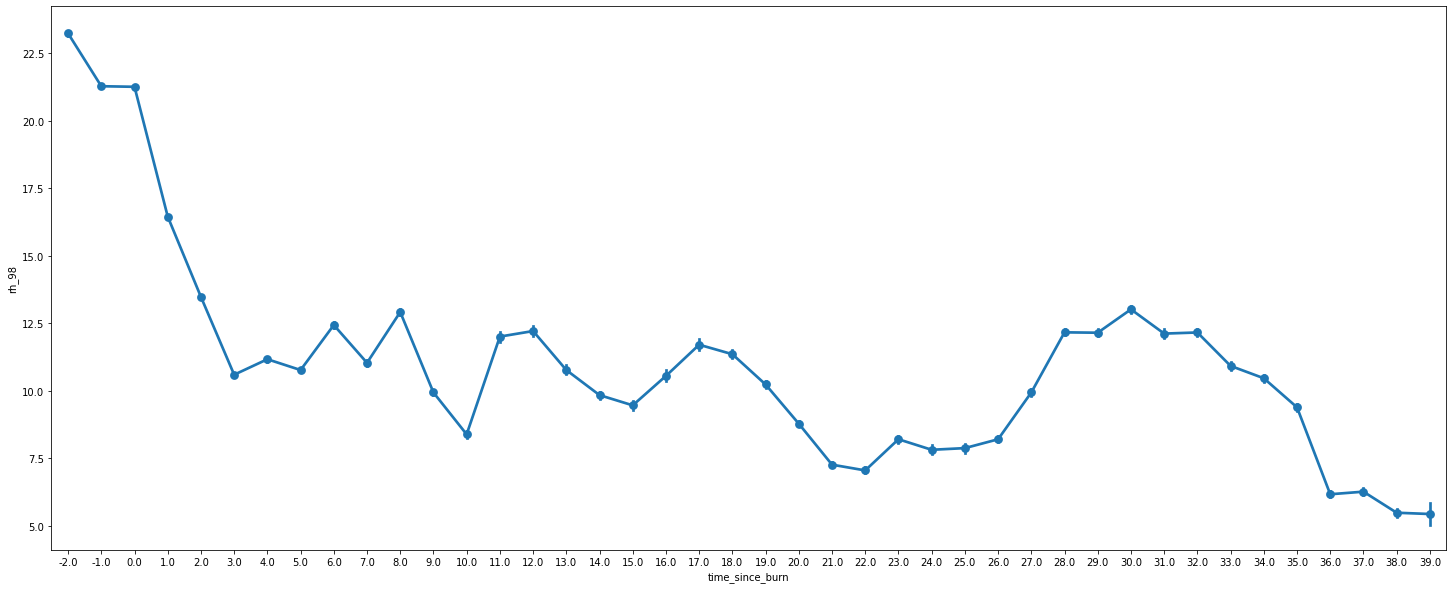

In [123]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
sns.pointplot(gedi_burned, x="time_since_burn", y="rh_98")

<AxesSubplot: xlabel='rh_98', ylabel='Count'>

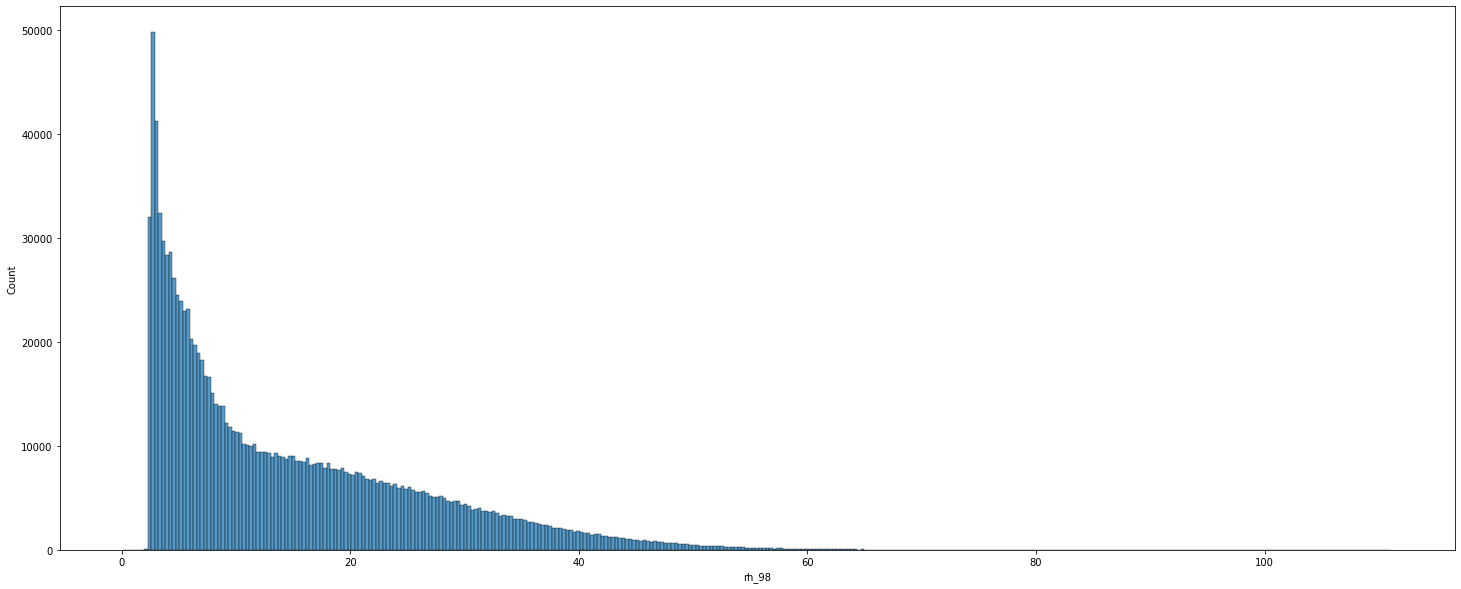

In [124]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
sns.histplot(gedi_burned, x="rh_98")

In [127]:
gedi_burned.columns

Index(['shot_number', 'beam_type', 'absolute_time', 'longitude', 'latitude',
       'elevation_difference_tdx', 'agbd', 'agbd_se', 'fhd_normal', 'pai',
       'pai_z', 'pavd_z', 'rh_98', 'rh_70', 'rh_50', 'rh_25', 'cover',
       'cover_z', 'sensitivity_a0', 'solar_elevation', 'gridded_pft_class',
       'geometry', 'gedi_year', 'gedi_month', 'severity', 'burn_year',
       'burn_count', 'time_since_burn', 'aspect_mean', 'elevation',
       'slope_mean', 'soil', 'land_cover_2x2', 'land_cover_mean',
       'land_cover_std', 'land_cover_median'],
      dtype='object')

In [128]:
gedi_burned_f = gedi_burned[
    (gedi_burned.land_cover_std == 0) &
    (gedi_burned.land_cover_median == 1)]

<AxesSubplot: xlabel='rh_98', ylabel='Count'>

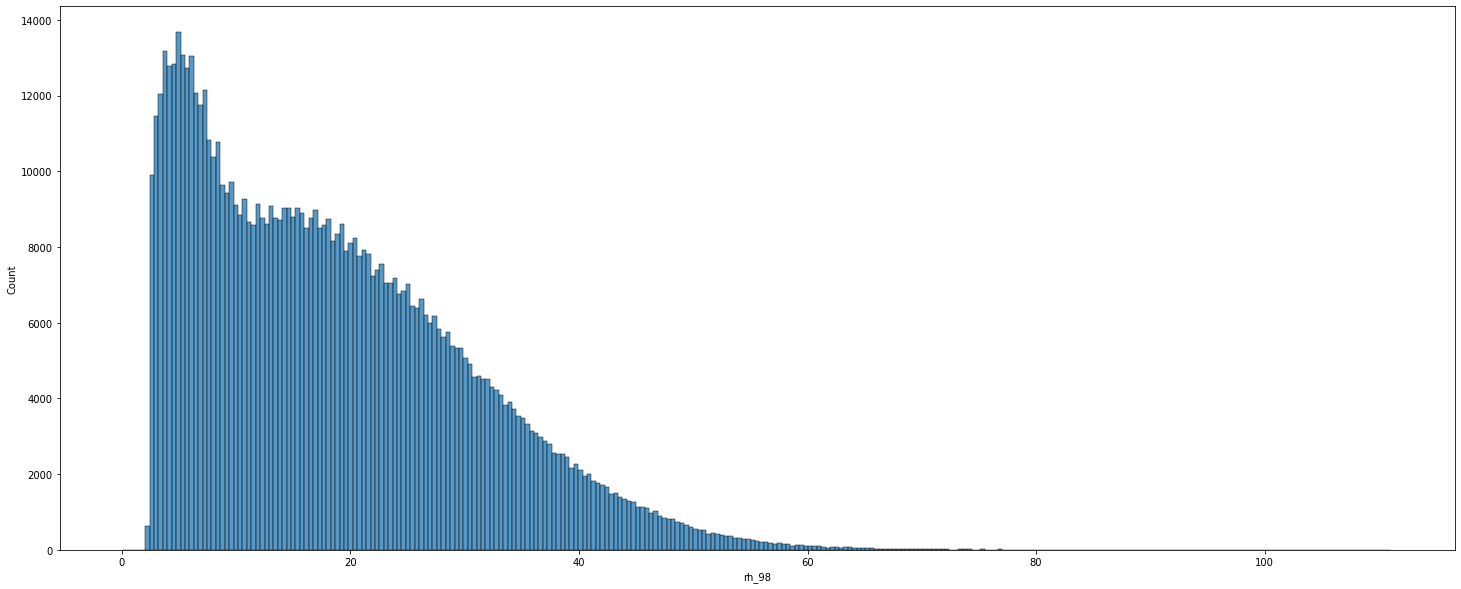

In [129]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
sns.histplot(gedi_burned_f, x="rh_98")

In [139]:
gedi_burned_f = gedi_burned_f[gedi_burned_f.time_since_burn < 36]

<AxesSubplot: xlabel='time_since_burn', ylabel='rh_98'>

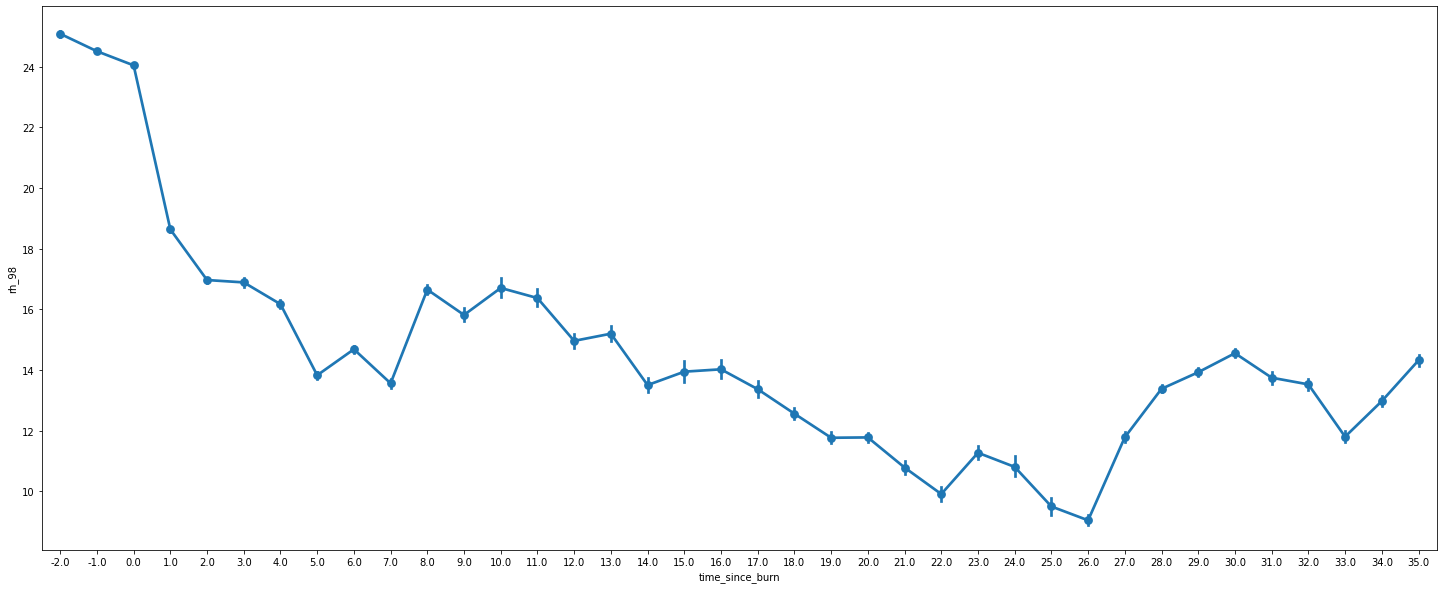

In [140]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
sns.pointplot(gedi_burned_f, x="time_since_burn", y="rh_98")

<AxesSubplot: xlabel='time_since_burn', ylabel='rh_98'>

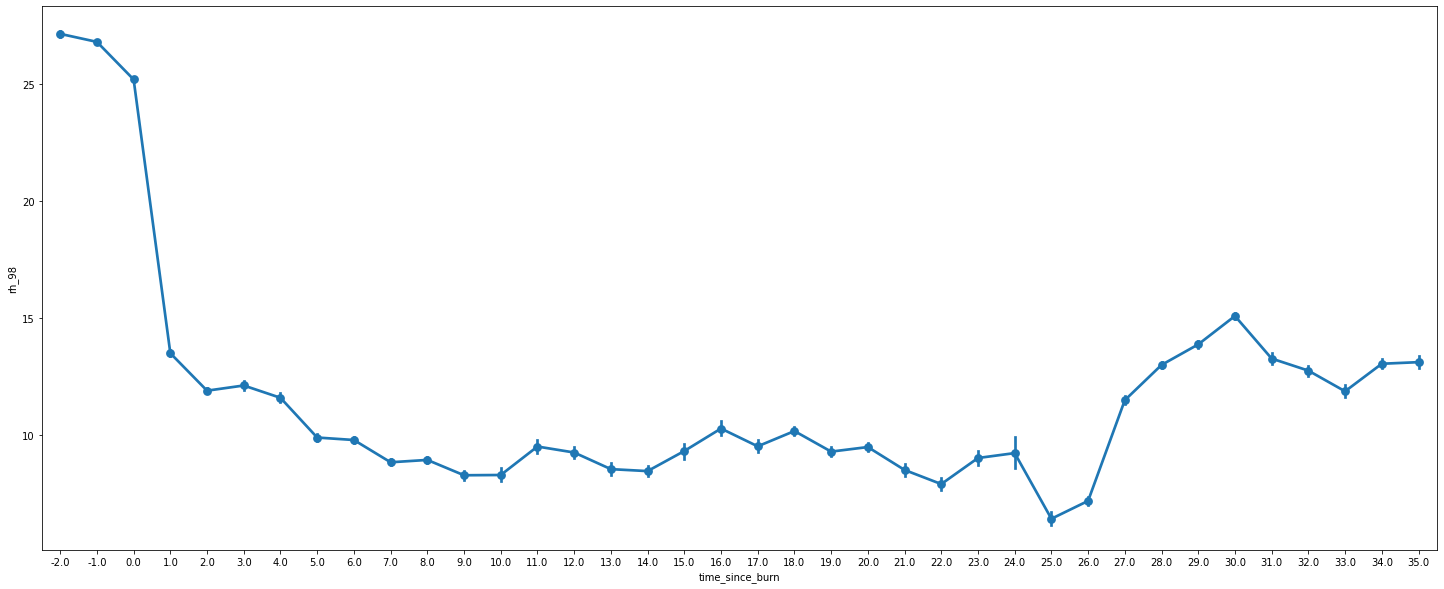

In [141]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
sns.pointplot(gedi_burned_f[gedi_burned_f.severity == 4], x="time_since_burn", y="rh_98")

<AxesSubplot: xlabel='time_since_burn', ylabel='rh_98'>

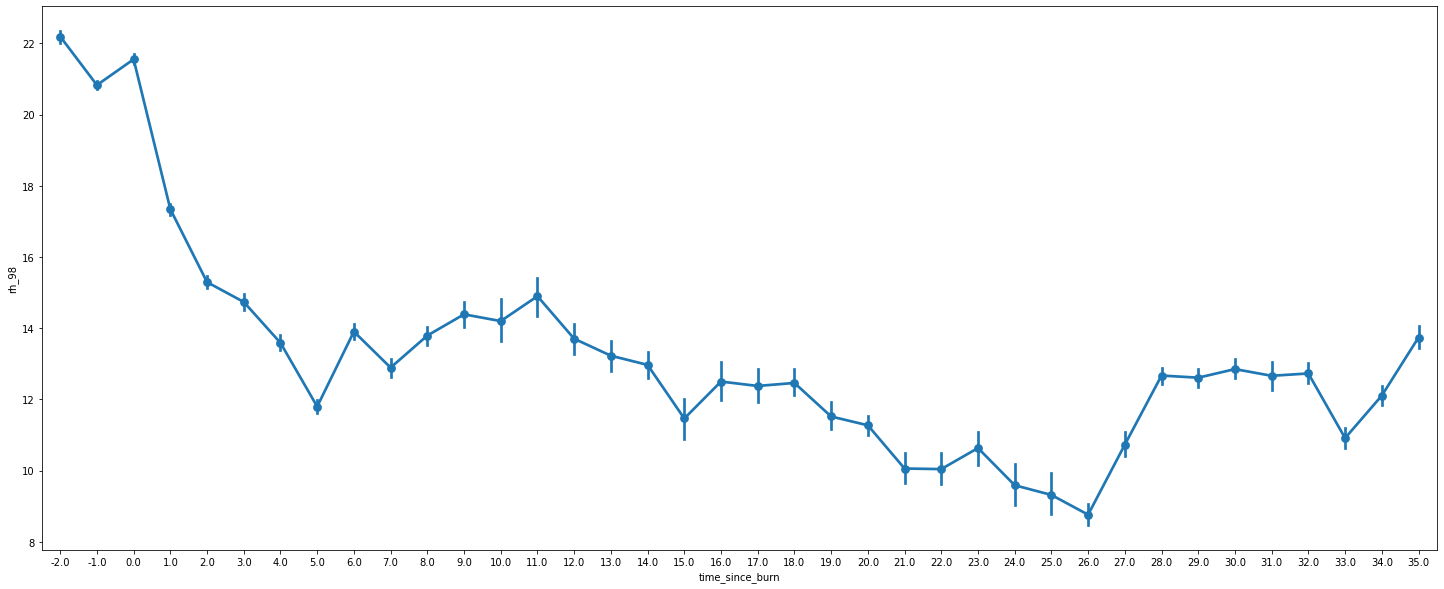

In [142]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
sns.pointplot(gedi_burned_f[gedi_burned_f.severity == 3], x="time_since_burn", y="rh_98")

<AxesSubplot: xlabel='time_since_burn', ylabel='rh_98'>

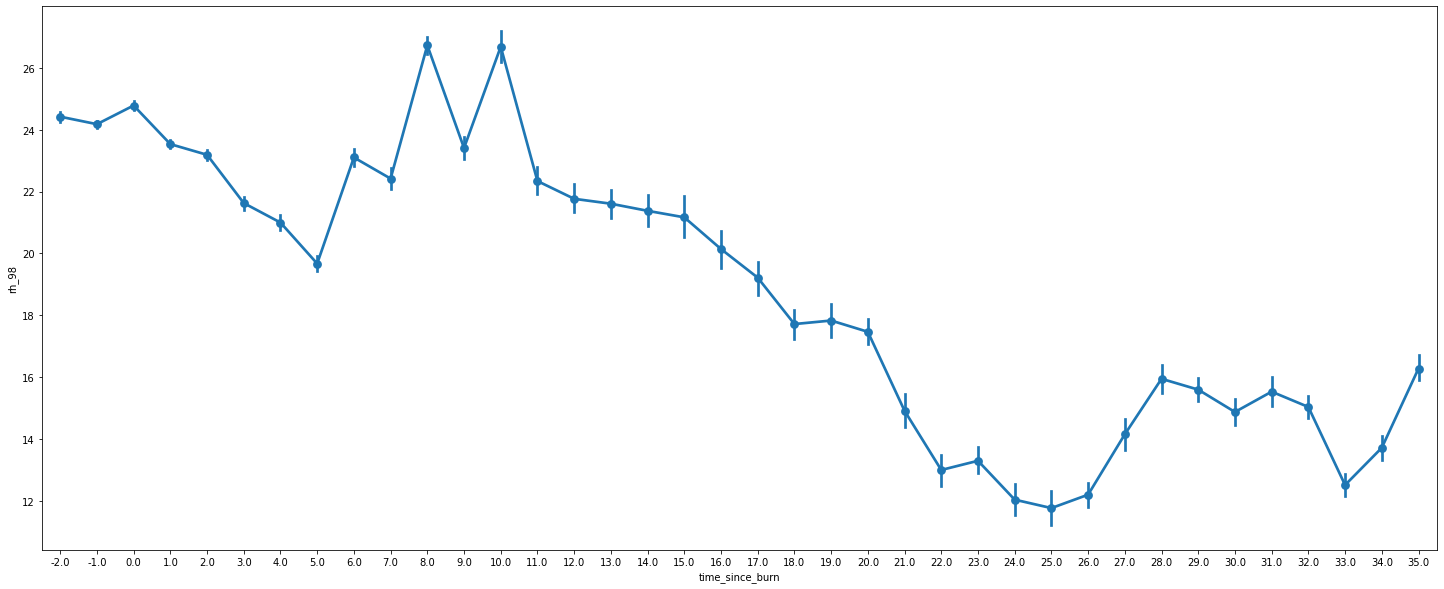

In [143]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
sns.pointplot(gedi_burned_f[gedi_burned_f.severity == 2], x="time_since_burn", y="rh_98")

<AxesSubplot: xlabel='time_since_burn', ylabel='slope_mean'>

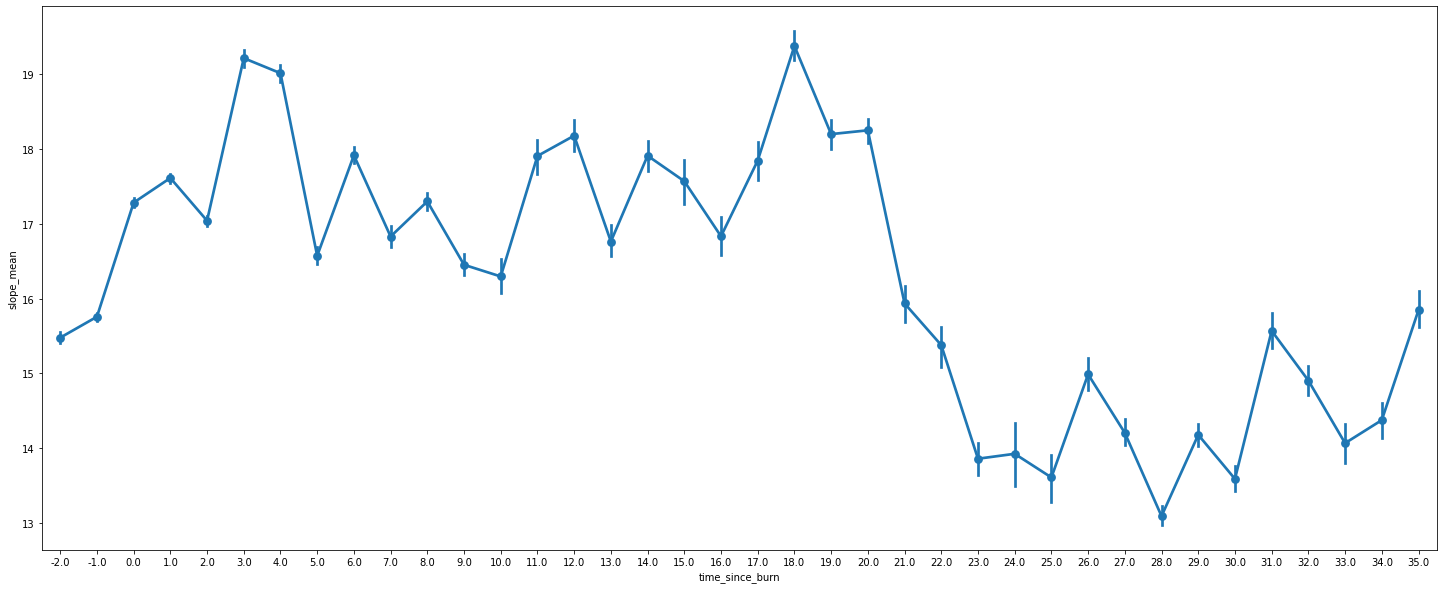

In [144]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
sns.pointplot(gedi_burned_f[gedi_burned_f.time_since_burn < 36], x="time_since_burn", y="slope_mean")

<AxesSubplot: xlabel='time_since_burn', ylabel='agbd'>

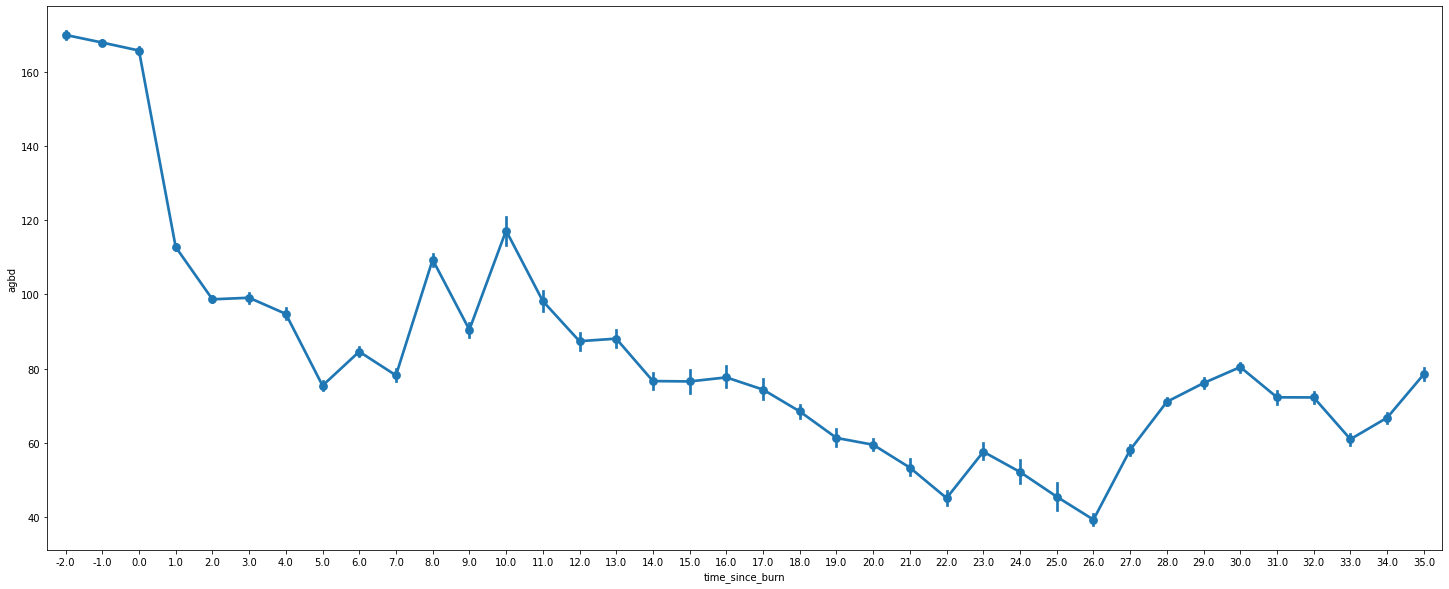

In [145]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
sns.pointplot(gedi_burned_f[gedi_burned_f.time_since_burn < 36], x="time_since_burn", y="agbd")